In [110]:
import numpy as np
import matplotlib.pyplot as plt

============================================================
1. DATA GENERATION (SAME SETUP AS RIDGE)
============================================================

In [111]:
np.random.seed(42)

In [112]:
n = 60
d = 500
s = 8
sigma = 0.1

In [113]:
X = np.random.randn(n, d)

In [114]:
beta_true = np.zeros(d)
beta_true[:s] = np.random.randn(s)

In [115]:
y = X @ beta_true + sigma * np.random.randn(n)

In [116]:
print("Data generated")
print("X shape:", X.shape)
print("y shape:", y.shape)
print("-" * 50)

Data generated
X shape: (60, 500)
y shape: (60,)
--------------------------------------------------


============================================================
2. SOFT-THRESHOLDING OPERATOR
============================================================

In [117]:
def soft_threshold(z, lam):
    """
    Soft-thresholding operator:
        S(z, λ)
    """
    if z > lam:
        return z - lam
    elif z < -lam:
        return z + lam
    else:
        return 0.0

============================================================
3. LASSO VIA COORDINATE DESCENT (FROM SCRATCH)
============================================================

In [118]:
def lasso_coordinate_descent(X, y, lam, max_iter=1000, tol=1e-6):
    """
    Solve LASSO using coordinate descent.

    Objective:
        (1/2)||y - Xβ||^2 + λ||β||_1
    """
    n, d = X.shape
    beta = np.zeros(d)

    X_col_norms = np.sum(X ** 2, axis=0)

    for it in range(max_iter):
        beta_old = beta.copy()

        for j in range(d):
            
            r_j = y - X @ beta + X[:, j] * beta[j]
         
            rho = X[:, j].T @ r_j
            beta[j] = soft_threshold(rho / n, lam) / (X_col_norms[j] / n)
        
        if np.linalg.norm(beta - beta_old) < tol:
            break

    return beta

============================================================
4. RUN LASSO
============================================================

In [119]:
lam = 0.05

In [120]:
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [121]:
beta_lasso = lasso_coordinate_descent(X, y, lam)

In [122]:
print("LASSO solved via coordinate descent")
print("||β̂_lasso||_2:", np.linalg.norm(beta_lasso))
print("-" * 50)

LASSO solved via coordinate descent
||β̂_lasso||_2: 2.695578998023315
--------------------------------------------------


============================================================
5. SPARSITY ANALYSIS
============================================================

In [123]:
nonzeros = np.sum(np.abs(beta_lasso) > 1e-6)

In [124]:
for lam in [0.5, 0.3, 0.2, 0.1, 0.05]:
    beta = lasso_coordinate_descent(X, y, lam)
    nz = np.sum(np.abs(beta) > 1e-6)
    err = np.linalg.norm(beta - beta_true)
    print(f"λ={lam:.2f}  nonzeros={nz}  error={err:.3f}")


λ=0.50  nonzeros=7  error=1.241
λ=0.30  nonzeros=7  error=0.889
λ=0.20  nonzeros=9  error=0.656
λ=0.10  nonzeros=9  error=0.428
λ=0.05  nonzeros=14  error=0.308


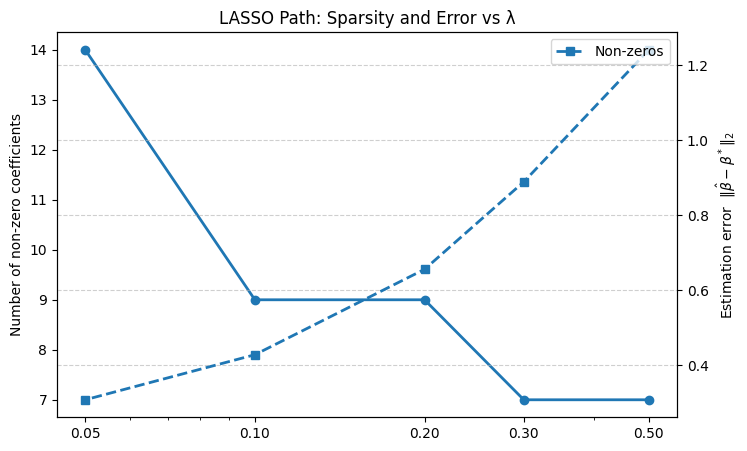

In [125]:
lambdas = np.array([0.5, 0.3, 0.2, 0.1, 0.05])

nonzeros_list = []
error_list = []

for lam in lambdas:
    beta_hat = lasso_coordinate_descent(X, y, lam)
    
    nonzeros = np.sum(np.abs(beta_hat) > 1e-6)
    error = np.linalg.norm(beta_hat - beta_true)
    
    nonzeros_list.append(nonzeros)
    error_list.append(error)

# Convert to arrays
nonzeros_list = np.array(nonzeros_list)
error_list = np.array(error_list)

# =========================
# Plot
# Sort lambdas from large to small
order = np.argsort(-lambdas)
lambdas_sorted = lambdas[order]
nonzeros_sorted = nonzeros_list[order]
error_sorted = error_list[order]

plt.figure(figsize=(8, 5))

# Left y-axis: nonzeros
plt.plot(lambdas_sorted, nonzeros_sorted, marker='o', linewidth=2)
plt.ylabel("Number of non-zero coefficients")

# Right y-axis: error
ax2 = plt.twinx()
ax2.plot(lambdas_sorted, error_sorted, marker='s', linestyle='--', linewidth=2)
ax2.set_ylabel(r"Estimation error  $\|\hat{\beta}-\beta^*\|_2$")

# X-axis
plt.xscale("log")
plt.xlabel("λ (regularization strength)")

# Explicit tick labels (this fixes the ugly 10^-1 issue)
plt.xticks(
    lambdas_sorted,
    [f"{l:.2f}" for l in lambdas_sorted]
)
plt.legend(["Non-zeros", "Estimation Error"], loc="upper right")
plt.title("LASSO Path: Sparsity and Error vs λ")
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.show()



============================================================
6. ESTIMATION ERROR
============================================================

In [126]:
error = np.linalg.norm(beta_lasso - beta_true)

In [127]:
print("LASSO estimation error ||β̂ − β*||_2:", error)
print("-" * 50)

LASSO estimation error ||β̂ − β*||_2: 0.30768513557182003
--------------------------------------------------


In [128]:
print("L1 regularisation (LASSO) from scratch completed successfully.")

L1 regularisation (LASSO) from scratch completed successfully.
